# 05_03: Filling Missing Values

In [48]:
# 导入Python标准库中的数学模块，提供了许多数学函数和常量
import math
# 导入Python标准库中的集合模块，提供了一些特殊的容器数据类型，如Counter、deque等
import collections
# 导入Python标准库中的urllib模块，用于处理URL相关的操作，如打开URL、解析URL等
import urllib

# 导入NumPy库，用于进行科学计算和数组操作，并将其简称为np
import numpy as np
# 导入Pandas库，用于数据处理和分析，并将其简称为pd
import pandas as pd
# 导入Matplotlib库的pyplot模块，用于创建静态、动态和交互式可视化，并将其简称为pp
import matplotlib.pyplot as pp

# 使用Jupyter Notebook的魔法命令，使Matplotlib的图形直接显示在Notebook中
%matplotlib inline


In [49]:
import getweather

In [50]:
# 调用 getweather 模块中的 getyear 函数，获取 'PASADENA' 城市在2001年的天气数据
# 筛选出 'TMIN'（最低温度）和 'TMAX'（最高温度）这两个数据列
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001) 


In [51]:
# 计算 'PASADENA' 城市在2001年的最低温度的平均值、最小值和最大值
np.mean(pasadena['TMIN']), np.min(pasadena['TMIN']), np.max(pasadena['TMIN'])


(nan, nan, nan)

In [52]:
pasadena['TMIN']

array([ 9.4,  8.3,  8.9,  8.3, 10. , 10.6,  7.2,  7.2,  7.8,  6.1,  5.6,
        6.1,  5. ,  3.9,  4.4,  2.8,  5. ,  3.9,  5.6,  7.2,  7.2,  8.9,
        5.6,  6.7,  3.3,  5.6,  3.3,  3.3,  3.3,  3.9,  5. ,  5. ,  6.1,
        nan,  7.2, 13.9, 11.1,  5.6,  2.2,  3.9,  6.1,  3.3,  5.6,  6.1,
        2.8,  2.8,  4.4,  7.8, 10. ,  9.4,  5.6,  5.6,  7.8,  5. ,  3.9,
        6.7,  7.2,  7.8,  6.7,  5. ,  5.6,  8.3,  9.4, 10. ,  9.4, 10. ,
        8.9, 10.6,  6.1,  8.9,  8.3,  7.2,  7.8, 10. , 10. ,  7.8, 10.6,
       13.3, 14.4, 10.6, 11.7, 11.1,  9.4, 10. , 12.2, 10. , 11.1, 12.8,
       12.8, 12.8, 12.2, 11.1, 10.6,  8.3,  8.3,  6.1,  7.2,  3.3, 16.1,
        3.9,  8.9,  7.8,  6.7,  7.2,  7.2,  9.4,  9.4, 12.2, 11.1,  8.9,
        6.1,  7.2, 10. , 10. , 16.1, 12.2, 12.8, 11.7,  nan, 11.1, 11.7,
       12.2, 11.1, 10.6, 11.1, 12.2, 13.3, 15.6, 16.1, 14.4, 13.3, 13.9,
       13.3, 10.6, 13.3, 13.9, 14.4, 15. ,  nan, 11.1, 14.4, 15. , 15.6,
       15. , 15.6, 16.7, 14.4, 14.4, 12.8, 13.9, 15

In [53]:
# 将1与NaN相加，结果仍为NaN
# 因为NaN表示缺失或未定义的数据，任何数值与NaN进行算术运算的结果都是NaN
np.nan + 1


nan

In [54]:
# 检查 'PASADENA' 城市在2001年的最低温度数据中是否存在缺失值（NaN）
# np.isnan() 函数用于检查数组中的元素是否为 NaN（Not a Number）
# pasadena['TMIN'] 是从 'PASADENA' 城市的天气数据中提取的最低温度列
# 返回一个布尔数组，其中 True 表示对应位置的温度值是 NaN，False 表示不是 NaN
np.isnan(pasadena['TMIN'])


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [55]:
False + True + True

2

In [56]:
# 计算 'PASADENA' 城市在2001年的最低温度数据中缺失值（NaN）的数量
# np.isnan() 函数用于检查数组中的元素是否为 NaN（Not a Number）
# pasadena['TMIN'] 是从 'PASADENA' 城市的天气数据中提取的最低温度列
# np.sum() 函数用于计算数组中 True 值的数量，即缺失值的数量
np.sum(np.isnan(pasadena['TMIN']))


15

In [57]:
# 计算 'PASADENA' 城市在2001年的最低温度数据中的最小值，忽略缺失值（NaN）
# np.nanmin() 函数用于计算数组中的最小值，忽略 NaN 值
# pasadena['TMIN'] 是从 'PASADENA' 城市的天气数据中提取的最低温度列
# 计算 'PASADENA' 城市在2001年的最高温度数据中的最大值，忽略缺失值（NaN）
# np.nanmax() 函数用于计算数组中的最大值，忽略 NaN 值
# pasadena['TMAX'] 是从 'PASADENA' 城市的天气数据中提取的最高温度列
np.nanmin(pasadena['TMIN']), np.nanmax(pasadena['TMAX'])


(2.2, 41.1)

In [58]:
pasadena['TMIN'][np.isnan(pasadena['TMIN'])] = np.nanmean(pasadena['TMIN']) #计算均值替换nan
pasadena['TMAX'][np.isnan(pasadena['TMAX'])] = np.nanmean(pasadena['TMAX']) #计算均值替换nan

In [59]:
pasadena['TMIN']

array([ 9.4       ,  8.3       ,  8.9       ,  8.3       , 10.        ,
       10.6       ,  7.2       ,  7.2       ,  7.8       ,  6.1       ,
        5.6       ,  6.1       ,  5.        ,  3.9       ,  4.4       ,
        2.8       ,  5.        ,  3.9       ,  5.6       ,  7.2       ,
        7.2       ,  8.9       ,  5.6       ,  6.7       ,  3.3       ,
        5.6       ,  3.3       ,  3.3       ,  3.3       ,  3.9       ,
        5.        ,  5.        ,  6.1       , 11.45314286,  7.2       ,
       13.9       , 11.1       ,  5.6       ,  2.2       ,  3.9       ,
        6.1       ,  3.3       ,  5.6       ,  6.1       ,  2.8       ,
        2.8       ,  4.4       ,  7.8       , 10.        ,  9.4       ,
        5.6       ,  5.6       ,  7.8       ,  5.        ,  3.9       ,
        6.7       ,  7.2       ,  7.8       ,  6.7       ,  5.        ,
        5.6       ,  8.3       ,  9.4       , 10.        ,  9.4       ,
       10.        ,  8.9       , 10.6       ,  6.1       ,  8.9 

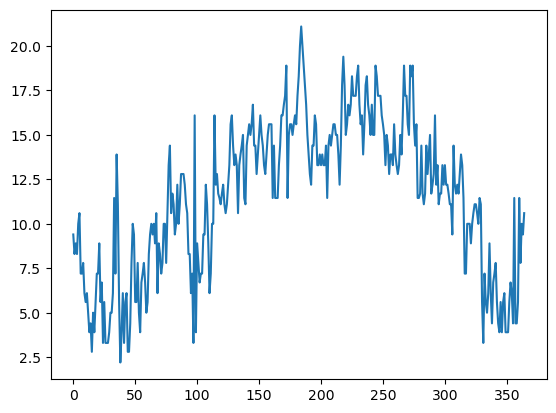

In [60]:
pp.plot(pasadena['TMIN'])
pp.show()

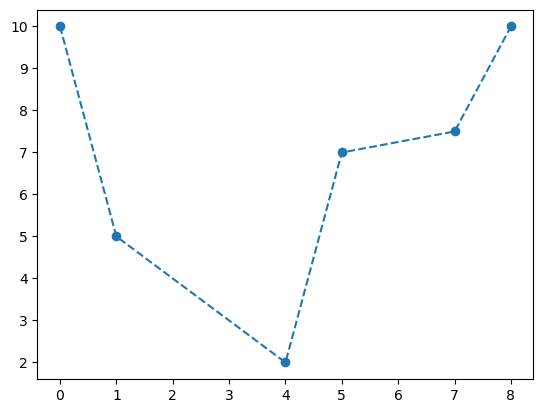

In [61]:
# 定义 x 轴数据，数据类型为双精度浮点数
xdata = np.array([0,1,4,5,7,8], 'd')
# 定义 y 轴数据，数据类型为双精度浮点数
ydata = np.array([10,5,2,7,7.5,10], 'd')

# 使用 matplotlib.pyplot 绘制折线图，数据点用圆圈表示，线条为虚线
pp.plot(xdata, ydata, '--o')
pp.show()


In [62]:
# 在 0 到 8 的范围内生成 9 个等间隔的新数据点
xnew = np.linspace(0, 8, 9)
# 使用线性插值法，根据原始数据点（xdata, ydata）计算新数据点（xnew）对应的 y 值
ynew = np.interp(xnew, xdata, ydata)

# 绘制原始数据点，使用圆圈标记，线条为虚线，标记大小为10
pp.plot(xdata, ydata, '--o', ms=10)
# 绘制新数据点，使用方块标记
pp.plot(xnew, ynew, 's')
pp.show()


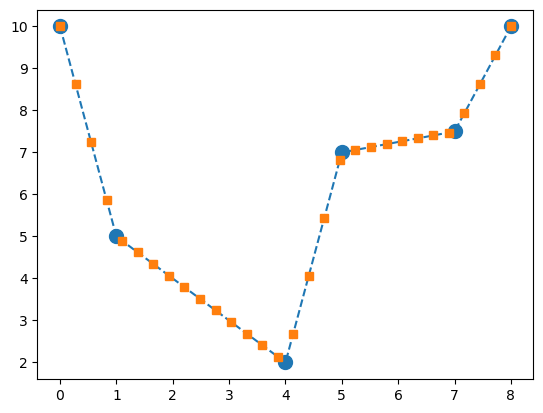

In [63]:
# 在 0 到 8 的范围内生成 30 个等间隔的新数据点
xnew = np.linspace(0, 8, 30)
# 使用线性插值法，根据原始数据点（xdata, ydata）计算新数据点（xnew）对应的 y 值
ynew = np.interp(xnew, xdata, ydata)

# 绘制原始数据点，使用圆圈标记，线条为虚线，标记大小为10
pp.plot(xdata, ydata, '--o', ms=10)
# 绘制新数据点，使用方块标记
pp.plot(xnew, ynew, 's')
pp.show()


In [64]:
# 从 'PASADENA' 城市获取2001年的天气数据，包括最低温度（'TMIN'）和最高温度（'TMAX'）
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001)


In [65]:
# 创建一个布尔数组 'good'，用于标记 'PASADENA' 城市在2001年的最低温度数据中哪些值不是 NaN
# np.isnan(pasadena['TMIN']) 返回一个布尔数组，指示 'TMIN' 列中的哪些值是 NaN
# ~ 运算符用于取反，因此 'good' 数组中的 True 表示对应位置的温度值不是 NaN，False 表示是 NaN
good = ~np.isnan(pasadena['TMIN'])

# 创建一个从0到364的数组 'x'，用于表示一年中的天数
x = np.arange(0, 365)

# 使用线性插值法，根据 'good' 数组中标记为 True 的数据点，对 'PASADENA' 城市在2001年的最低温度数据进行插值
# np.interp(x, x[good], pasadena['TMIN'][good]) 将 'x' 数组中的值映射到 'good' 数组中标记为 True 的数据点上，返回插值后的温度值
np.interp(x, x[good], pasadena['TMIN'][good])


array([ 9.4  ,  8.3  ,  8.9  ,  8.3  , 10.   , 10.6  ,  7.2  ,  7.2  ,
        7.8  ,  6.1  ,  5.6  ,  6.1  ,  5.   ,  3.9  ,  4.4  ,  2.8  ,
        5.   ,  3.9  ,  5.6  ,  7.2  ,  7.2  ,  8.9  ,  5.6  ,  6.7  ,
        3.3  ,  5.6  ,  3.3  ,  3.3  ,  3.3  ,  3.9  ,  5.   ,  5.   ,
        6.1  ,  6.65 ,  7.2  , 13.9  , 11.1  ,  5.6  ,  2.2  ,  3.9  ,
        6.1  ,  3.3  ,  5.6  ,  6.1  ,  2.8  ,  2.8  ,  4.4  ,  7.8  ,
       10.   ,  9.4  ,  5.6  ,  5.6  ,  7.8  ,  5.   ,  3.9  ,  6.7  ,
        7.2  ,  7.8  ,  6.7  ,  5.   ,  5.6  ,  8.3  ,  9.4  , 10.   ,
        9.4  , 10.   ,  8.9  , 10.6  ,  6.1  ,  8.9  ,  8.3  ,  7.2  ,
        7.8  , 10.   , 10.   ,  7.8  , 10.6  , 13.3  , 14.4  , 10.6  ,
       11.7  , 11.1  ,  9.4  , 10.   , 12.2  , 10.   , 11.1  , 12.8  ,
       12.8  , 12.8  , 12.2  , 11.1  , 10.6  ,  8.3  ,  8.3  ,  6.1  ,
        7.2  ,  3.3  , 16.1  ,  3.9  ,  8.9  ,  7.8  ,  6.7  ,  7.2  ,
        7.2  ,  9.4  ,  9.4  , 12.2  , 11.1  ,  8.9  ,  6.1  ,  7.2  ,
      

In [66]:
def fillnans(array):
    """
    该函数用于填充数组中的缺失值（NaN）。

    参数:
    array (numpy.ndarray): 需要填充缺失值的数组。

    返回:
    numpy.ndarray: 填充缺失值后的数组。

    算法:
    1. 创建一个布尔数组 'good'，用于标记数组中哪些值不是 NaN。
    2. 创建一个从0到数组长度的数组 'x'，用于表示数组的索引。
    3. 使用线性插值法，根据 'good' 数组中标记为 True 的数据点，对数组进行插值。
    4. 返回插值后的数组。
    """
    # 创建一个布尔数组 'good'，用于标记数组中哪些值不是 NaN
    good = ~np.isnan(array)
    # 创建一个从0到数组长度的数组 'x'，用于表示数组的索引
    x = np.arange(len(array))

    # 使用线性插值法，根据 'good' 数组中标记为 True 的数据点，对数组进行插值
    return np.interp(x, x[good], array[good])


In [70]:
pp.plot(fillnans(pasadena['TMIN']))
pp.plot(fillnans(pasadena['TMAX']))
pp.show()